# 2 - COMPUTER VISION - Region Masking and Color Select
    The aim of this program is to mark white lanes on the still image with region masking applied

In [1]:
#import libraries
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

image_path = "../../../InputData/BasicColorSelection/test_image.jpg"

# read the image
image = mpimg.imread(image_path)

# always work on the copy of the image
y_size = image.shape[0]
x_size = image.shape[1]

# prepare the images
color_select = np.copy(image)
line_image = np.copy(image)

### Color Selection

In [29]:
# define color selection criteria
red_threshold = 200
green_threshold = 200
blue_threshold = 200
rgb_threshold = [red_threshold, green_threshold, blue_threshold]

# Mask pixels below the threshold
color_thresholds =  (color_select[:, :, 0] < rgb_threshold[0]) | \
                    (color_select[:, :, 1] < rgb_threshold[1]) | \
                    (color_select[:, :, 2] < rgb_threshold[2])    

color_select[color_thresholds] = [0, 0, 0]

### Region of interest
    In this case we decide that the region of interst is a triangle

In [30]:
left_bottom = [0, 539]
right_bottom = [900, 539]
apex = [475, 320]

# Fit the lines (y=Ax + B) to identify the 3 sided ROI
fit_left = np.polyfit( (left_bottom[0], apex[0]), (left_bottom[1], apex[1]), 1)
fit_right = np.polyfit( (right_bottom[0], apex[0]), (right_bottom[1], apex[1]), 1)
fit_bottom = np.polyfit( (left_bottom[0], right_bottom[0]), (left_bottom[1], right_bottom[1]), 1)

# Find the ROI
XX, YY = np.meshgrid(np.arange(0, x_size), np.arange(0, y_size))
region_thresholds = (YY > (XX * fit_left[0] + fit_left[1])) & \
                    (YY > (XX * fit_right[0] + fit_right[1])) & \
                    (YY < (XX * fit_bottom[0] + fit_bottom[1]))

### Combine ROI and Color Select

In [31]:
line_image[~color_thresholds & region_thresholds] = [255, 0, 0]

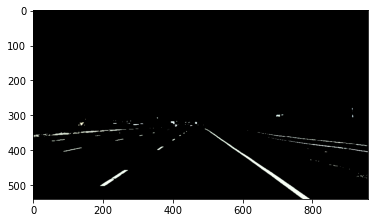

In [32]:
# Display tho output images
plt.imshow(color_select)

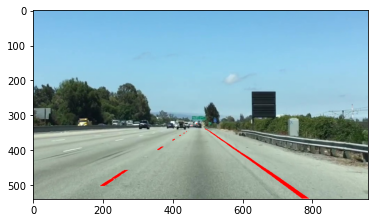

In [33]:
plt.imshow(line_image)

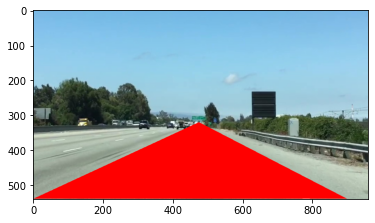

In [35]:
line_image[region_thresholds] = [255, 0, 0]
plt.imshow(line_image)